In [17]:
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv_data')

In [18]:
fish_input = fish.iloc[:,1:].to_numpy()
fish_target = fish.Species.to_numpy()

In [19]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

In [20]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [21]:
from sklearn.linear_model import SGDClassifier
# 확률적 경사 하강법만(한개씩 사용해서 학습)
sc = SGDClassifier(loss='log', max_iter=10, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.773109243697479
0.775


/home/byeongryul/.local/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [22]:
sc.partial_fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8151260504201681
0.85


In [28]:
import numpy as np
sc = SGDClassifier(loss='log', random_state=42)
train_score = []
test_score = []
classes = np.unique(train_target)
for _ in range(200):
    sc.partial_fit(train_scaled, train_target, classes=classes)
    train_score.append(sc.score(train_input, train_target))
    test_score.append(sc.score(test_input, test_target))

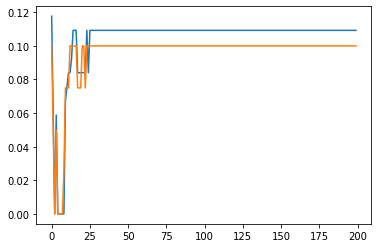

In [29]:
import matplotlib.pyplot as plt
plt.plot(train_score)
plt.plot(test_score)

In [26]:
sc = SGDClassifier(loss='log', max_iter=50, tol=None, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9243697478991597
0.925


In [27]:
sc = SGDClassifier(loss='hinge', max_iter=50, tol=None, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9243697478991597
0.925
